# Project Title: B & J Biscuit Sales Performane Analysis

## Table of Content

- [Introduction](#intro)
- [Business Objectives](#boj)
- [Dataset Description](#dataset)
- [Data Wrangling](#wrangle)
- [Exploratory Data Analyis](#eda)

<a id="intro"></a>
## Introduction
> In today’s competitive business environment, data-driven decision-making has become essential for improving operational efficiency and achieving sustainable growth. For the management team at B & J Biscuit Company, analyzing sales performance is crucial for understanding customer demand, identifying revenue-driving products, and uncovering hidden trends and patterns across regions, customer segments, and time periods.

### Business Problem
> B & J Biscuit Company produces a wide range of biscuit products distributed across major cities. Recently, the company noticed inconsistent sales patterns, unclear customer demographics, and varying product performance across regions.

The management wants to understand:

- Which products perform best
- Which locations generate the most sales
- Who their customers are?
- Which payment methods and sales reps influence performance
- How to optimize inventory and marketing decisions

You have been hired as a Data Analyst to clean their messy sales data and generate actionable insights.


<a id="boj"></a>
## Business Objectives

**Sales & Product Performance**
- What are the best-selling products?
- What time periods show the highest sales?
- Which sales representatives drive the most quantity sold?

**Customer Insights**
- What customer demographic groups buy the most?
- Which locations contribute the most sales?
- What is the age distribution of buyers?
  
**Operational Insights**
- Are there inconsistencies in payment methods?
- Are there inventory risks due to unexpectedly high or low product demand?


<a id="dataset"></a>
## Dataset Description
The dataset contains two excel sheets that form the foundation of the sales performance analysis:

**Transaction Data**

**Original Columns:**
- Transaction Date
- Buyer First Name
- Buyer Last Name
- Buyer Location
- Buyer Date of Birth
- Payment Method
- Quantity Purchased
- Product Code
- Sales Representative
- Gender
  
**Products Data**

**Original Columns:**
- Product Code
- Biscuit Brand
- Cost (USD)
- Unit Price (USD)


<a id="wrangle"></a>
## Data Wrangling
> In this phase, we will be gather the data, assess its quality and structure issues, and clean it for easier analysis and visualization.

### Data Importation

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the excel file into dataframe

# transaction data
transaction_df_data = pd.read_excel("BJ_Biscuit_Messy_Dataset.xlsx", sheet_name=0)

# products data
products_df_data = pd.read_excel("BJ_Biscuit_Messy_Dataset.xlsx", sheet_name=1)

### Data Assessment
> Checking for any data quality and structure issues

#### Transaction Data

In [3]:
# preview the data
transaction_df_data.head()

,Transaction Date,Buyer First Name,Buyer Last Name,Buyer Location,Buyer Date of Birth,Payment Method,Quantity Purchased,Product Code,Sales Representative,Gender
0,45342,Allen,Santos,San Jose,20020,Debit C.,129,Pro04,Travis Doyle,Male
1,45366,Brenda,Shaw,San Jose,29346,Credit Card,370,Pro09,Joseph Hill,Female
2,45304,Robert,Hernandez,San Antonio,24237,Cahs,284,Pro02,April Watkins,Other
3,45421,Alexander,Smith,San Jose,16696,Credit Crd,90,Pro05,Elizabeth Guerrero,M
4,45432,Mary,Rodriguez,Philadelphia,19682,cash,475,Pro04,Tracy Lee,Female


In [4]:
# data information
transaction_df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Transaction Date      12000 non-null  int64 
 1   Buyer First Name      12000 non-null  object
 2   Buyer Last Name       12000 non-null  object
 3   Buyer Location        12000 non-null  object
 4   Buyer Date of Birth   12000 non-null  int64 
 5   Payment Method        12000 non-null  object
 6   Quantity Purchased    12000 non-null  int64 
 7   Product Code          12000 non-null  object
 8   Sales Representative  12000 non-null  object
 9   Gender                12000 non-null  object
dtypes: int64(3), object(7)
memory usage: 937.6+ KB


In [5]:
# statistics information
transaction_df_data.describe()

,Transaction Date,Buyer Date of Birth,Quantity Purchased
count,12000.000000,12000.000000,12000.000000
mean,45428.030833,27456.176750,254.192417
std,90.414667,6640.399709,143.349264
min,45292.000000,15920.000000,10.000000
25%,45354.000000,21635.750000,129.000000
50%,45419.000000,27494.000000,254.000000
75%,45483.000000,33143.000000,381.000000
max,45657.000000,38928.000000,500.000000


In [6]:
# location unique values
transaction_df_data['Buyer Location'].unique()

array(['San Jose', 'San Antonio', 'Philadelphia', 'San Diego', 'Chicago',
       'New York', 'Houston', 'Los Angeles', 'Dallas', 'Phoenix'],
      dtype=object)

In [7]:
# gender counts
transaction_df_data.Gender.value_counts()

Gender
Male         9851
Female       1132
Other         731
Femaleale     270
M              16
Name: count, dtype: int64

In [8]:
# payment method counts
transaction_df_data['Payment Method'].value_counts()

Payment Method
Credit Crd         1768
 Credit Card       1717
Debit C.           1706
Cahs               1677
Cash                445
credit card         442
Mobile Payment      439
Debit Card          435
Mobile Payment      433
debit card          431
Cash                426
cash                424
Credit Card         423
Debit Card          414
mobile payment      414
Credit Card         406
Name: count, dtype: int64

In [9]:
transaction_df_data['Sales Representative'].value_counts()

Sales Representative
Travis Doyle          2105
Joseph Hill           2089
April Watkins         1892
Susan Dean            1606
Sara Robertson        1523
Katie Stanton         1283
Tracy Lee             1181
Elizabeth Guerrero     320
Travis Dole              1
Name: count, dtype: int64

#### Data Quality Issues
**Transaction Data**
- Date formats: ` Transaction Date` and `Buyer Date of Birth`
- Inaccurate and Inconsistent data values: `Gender`, `Payment Method`, `Sales Representative`

#### Products Data

In [10]:
# data preview
products_df_data.head()

,Product Code,Biscuit Brand,Cost,Unit Price
0,Pro01,Butter Crunch,10,11
1,Pro02,Caramel Biscuits,18,22
2,Pro03,Choco Delight,3,5
3,Pro04,Cinnamon Swirls,10,14
4,Pro05,Ginger Snaps,14,28


In [11]:
# data information
products_df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product Code   10 non-null     object
 1   Biscuit Brand  10 non-null     object
 2   Cost           10 non-null     int64 
 3   Unit Price     10 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 452.0+ bytes


In [12]:
# statistics information
products_df_data.describe()

,Cost,Unit Price
count,10.000000,10.000000
mean,11.400000,20.000000
std,5.660781,13.291601
min,3.000000,5.000000
25%,7.750000,9.500000
50%,10.000000,18.000000
75%,17.000000,26.750000
max,19.000000,45.000000


In [57]:
products_df_data['Biscuit Brand'].unique()

array(['Butter Crunch', 'Caramel Biscuits', 'Choco Delight',
       'Cinnamon Swirls', 'Ginger Snaps', 'Lemon Crisps',
       'Oatmeal Cookies', 'Peanut Butter Bites', 'Shortbread',
       'Vanilla Wafers'], dtype=object)

### Data Cleaning and Transformation
> To ensure the accuracy and reliability of insights generated from the B & J Biscuit Sales dataset, a thorough data cleaning process was conducted. Data cleaning is a critical step in any analytics project, as it removes errors, resolves inconsistencies, and prepares the dataset for meaningful analysis. The following steps were carried out:

In [13]:
# make a copy
transaction_df_clean = transaction_df_data.copy()

#### Transaction Data

- Fix all date formats:  `Transaction Date` and `Buyer Date of Birth`

In [14]:
# convert transaction date (integer) to date
transaction_df_clean['Transaction Date'] = pd.to_datetime(transaction_df_clean['Transaction Date'], unit='D', origin='1899-12-30')

In [15]:
# convert buyer date of birth (integer) to date
transaction_df_clean['Buyer Date of Birth'] = pd.to_datetime(transaction_df_clean['Buyer Date of Birth'], unit='D', origin='1899-12-30')

In [16]:
# test
transaction_df_clean.head()

,Transaction Date,Buyer First Name,Buyer Last Name,Buyer Location,Buyer Date of Birth,Payment Method,Quantity Purchased,Product Code,Sales Representative,Gender
0,2024-02-20,Allen,Santos,San Jose,1954-10-23,Debit C.,129,Pro04,Travis Doyle,Male
1,2024-03-15,Brenda,Shaw,San Jose,1980-05-05,Credit Card,370,Pro09,Joseph Hill,Female
2,2024-01-13,Robert,Hernandez,San Antonio,1966-05-10,Cahs,284,Pro02,April Watkins,Other
3,2024-05-09,Alexander,Smith,San Jose,1945-09-16,Credit Crd,90,Pro05,Elizabeth Guerrero,M
4,2024-05-20,Mary,Rodriguez,Philadelphia,1953-11-19,cash,475,Pro04,Tracy Lee,Female


- Gender data issues: Standardizing gender names

In [17]:
# using np.where(condition,[x,y]) to replace values

# Replace "M" for Male
transaction_df_clean['Gender'] = np.where(transaction_df_clean['Gender'].isin(["M"]), "Male", 
                                                  transaction_df_clean['Gender'])

# Replace "Femaleale" for Female
transaction_df_clean['Gender'] = transaction_df_clean['Gender'].str.replace("Femaleale", "Female")

In [18]:
# test
transaction_df_clean['Gender'].value_counts()

Gender
Male      9867
Female    1402
Other      731
Name: count, dtype: int64

- Payment method data issues: Standardizing payment method names

In [19]:
# remove trailing spaces
transaction_df_clean['Payment Method'] = transaction_df_clean['Payment Method'].str.strip()

In [20]:
# using np.where(condition,[x,y]) to replace values
# replace for Credit Card
transaction_df_clean['Payment Method'] = np.where(transaction_df_clean['Payment Method'].isin(["Credit Crd", "credit card"]), "Credit Card", 
                                                  transaction_df_clean['Payment Method'])

# replace for Debit Card
transaction_df_clean['Payment Method'] = np.where(transaction_df_clean['Payment Method'].isin(["Debit C.", "debit card"]), "Debit Card", 
                                                  transaction_df_clean['Payment Method'])

# replace for Cash
transaction_df_clean['Payment Method'] = np.where(transaction_df_clean['Payment Method'].isin(["Cahs", "cash"]), "Cash", 
                                                  transaction_df_clean['Payment Method'])

# replace for Mobile Payment
transaction_df_clean['Payment Method'] = np.where(transaction_df_clean['Payment Method'].isin(["mobile payment"]), "Mobile Payment", 
                                                  transaction_df_clean['Payment Method'])

In [21]:
# test
transaction_df_clean['Payment Method'].value_counts()

Payment Method
Credit Card       4756
Debit Card        2986
Cash              2972
Mobile Payment    1286
Name: count, dtype: int64

- Sales Representative data issues: Standardizing sales rep names

In [22]:
# replace "Travis Dole" with "Travis Doyle"
transaction_df_clean['Sales Representative'] = transaction_df_clean['Sales Representative'].str.replace("Travis Dole", "Travis Doyle")

In [23]:
# test
transaction_df_clean['Sales Representative'].value_counts()

Sales Representative
Travis Doyle          2106
Joseph Hill           2089
April Watkins         1892
Susan Dean            1606
Sara Robertson        1523
Katie Stanton         1283
Tracy Lee             1181
Elizabeth Guerrero     320
Name: count, dtype: int64

#### Merging Data

In [24]:
bj_data = pd.merge(transaction_df_clean, products_df_data, how='left', on='Product Code')

In [25]:
bj_data.head()

,Transaction Date,Buyer First Name,Buyer Last Name,Buyer Location,Buyer Date of Birth,Payment Method,Quantity Purchased,Product Code,Sales Representative,Gender,Biscuit Brand,Cost,Unit Price
0,2024-02-20,Allen,Santos,San Jose,1954-10-23,Debit Card,129,Pro04,Travis Doyle,Male,Cinnamon Swirls,10,14
1,2024-03-15,Brenda,Shaw,San Jose,1980-05-05,Credit Card,370,Pro09,Joseph Hill,Female,Shortbread,10,45
2,2024-01-13,Robert,Hernandez,San Antonio,1966-05-10,Cash,284,Pro02,April Watkins,Other,Caramel Biscuits,18,22
3,2024-05-09,Alexander,Smith,San Jose,1945-09-16,Credit Card,90,Pro05,Elizabeth Guerrero,Male,Ginger Snaps,14,28
4,2024-05-20,Mary,Rodriguez,Philadelphia,1953-11-19,Cash,475,Pro04,Tracy Lee,Female,Cinnamon Swirls,10,14


In [26]:
bj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Transaction Date      12000 non-null  datetime64[ns]
 1   Buyer First Name      12000 non-null  object        
 2   Buyer Last Name       12000 non-null  object        
 3   Buyer Location        12000 non-null  object        
 4   Buyer Date of Birth   12000 non-null  datetime64[ns]
 5   Payment Method        12000 non-null  object        
 6   Quantity Purchased    12000 non-null  int64         
 7   Product Code          12000 non-null  object        
 8   Sales Representative  12000 non-null  object        
 9   Gender                12000 non-null  object        
 10  Biscuit Brand         12000 non-null  object        
 11  Cost                  12000 non-null  int64         
 12  Unit Price            12000 non-null  int64         
dtypes: datetime64[ns

#### Feature Engineering

- Creating Year, Month, Day, Weekday, Quarter of transaction date

In [27]:
# transaction year
bj_data['Year'] = bj_data['Transaction Date'].dt.year

# transaction month
bj_data['Month'] = bj_data['Transaction Date'].dt.month_name().str[:3]

# transaction day
bj_data['Day'] = bj_data['Transaction Date'].dt.day_name()

# transaction weekday
bj_data['Weekday'] = bj_data['Transaction Date'].dt.dayofweek

# transaction quarter
bj_data['Quarter'] = bj_data['Transaction Date'].dt.quarter

In [28]:
# test
bj_data.head()

,Transaction Date,Buyer First Name,Buyer Last Name,Buyer Location,Buyer Date of Birth,Payment Method,Quantity Purchased,Product Code,Sales Representative,Gender,Biscuit Brand,Cost,Unit Price,Year,Month,Day,Weekday,Quarter
0,2024-02-20,Allen,Santos,San Jose,1954-10-23,Debit Card,129,Pro04,Travis Doyle,Male,Cinnamon Swirls,10,14,2024,Feb,Tuesday,1,1
1,2024-03-15,Brenda,Shaw,San Jose,1980-05-05,Credit Card,370,Pro09,Joseph Hill,Female,Shortbread,10,45,2024,Mar,Friday,4,1
2,2024-01-13,Robert,Hernandez,San Antonio,1966-05-10,Cash,284,Pro02,April Watkins,Other,Caramel Biscuits,18,22,2024,Jan,Saturday,5,1
3,2024-05-09,Alexander,Smith,San Jose,1945-09-16,Credit Card,90,Pro05,Elizabeth Guerrero,Male,Ginger Snaps,14,28,2024,May,Thursday,3,2
4,2024-05-20,Mary,Rodriguez,Philadelphia,1953-11-19,Cash,475,Pro04,Tracy Lee,Female,Cinnamon Swirls,10,14,2024,May,Monday,0,2


- Customer Age

In [29]:
# today's date
today = pd.Timestamp.today()

bj_data['Age'] = (today - bj_data['Buyer Date of Birth']).dt.days // 365

- Total Sales Amount per transaction

In [30]:
bj_data['Amount'] = bj_data['Quantity Purchased'] * bj_data['Unit Price']

In [31]:
bj_data.head()

,Transaction Date,Buyer First Name,Buyer Last Name,Buyer Location,Buyer Date of Birth,Payment Method,Quantity Purchased,Product Code,Sales Representative,Gender,Biscuit Brand,Cost,Unit Price,Year,Month,Day,Weekday,Quarter,Age,Amount
0,2024-02-20,Allen,Santos,San Jose,1954-10-23,Debit Card,129,Pro04,Travis Doyle,Male,Cinnamon Swirls,10,14,2024,Feb,Tuesday,1,1,71,1806
1,2024-03-15,Brenda,Shaw,San Jose,1980-05-05,Credit Card,370,Pro09,Joseph Hill,Female,Shortbread,10,45,2024,Mar,Friday,4,1,45,16650
2,2024-01-13,Robert,Hernandez,San Antonio,1966-05-10,Cash,284,Pro02,April Watkins,Other,Caramel Biscuits,18,22,2024,Jan,Saturday,5,1,59,6248
3,2024-05-09,Alexander,Smith,San Jose,1945-09-16,Credit Card,90,Pro05,Elizabeth Guerrero,Male,Ginger Snaps,14,28,2024,May,Thursday,3,2,80,2520
4,2024-05-20,Mary,Rodriguez,Philadelphia,1953-11-19,Cash,475,Pro04,Tracy Lee,Female,Cinnamon Swirls,10,14,2024,May,Monday,0,2,72,6650


In [32]:
# convert Month to ordered categorical
order_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bj_data['Month'] = pd.Categorical(bj_data['Month'], categories=order_month, ordered=True)

# convert Day to ordered categorical
order_day = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
bj_data['Day'] = pd.Categorical(bj_data['Day'], categories=order_day, ordered=True)

#bj_data = bj_data.sort_values(by="MonthNum")

In [33]:
bj_data.describe()

,Transaction Date,Buyer Date of Birth,Quantity Purchased,Cost,Unit Price,Year,Weekday,Quarter,Age,Amount
count,12000,12000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.000000,12000.00000,12000.000000
mean,2024-05-16 00:44:24,1975-03-03 04:14:31.200000,254.192417,11.409500,20.232833,2024.0,3.014500,2.028833,50.30525,5130.656917
min,2024-01-01 00:00:00,1943-08-02 00:00:00,10.000000,3.000000,5.000000,2024.0,0.000000,1.000000,19.00000,50.000000
25%,2024-03-03 00:00:00,1959-03-26 18:00:00,129.000000,7.000000,9.000000,2024.0,1.000000,1.000000,35.00000,1680.000000
50%,2024-05-07 00:00:00,1975-04-10 00:00:00,254.000000,10.000000,22.000000,2024.0,3.000000,2.000000,50.00000,3498.000000
75%,2024-07-10 00:00:00,1990-09-27 00:00:00,381.000000,18.000000,28.000000,2024.0,5.000000,3.000000,66.00000,7448.000000
max,2024-12-31 00:00:00,2006-07-30 00:00:00,500.000000,19.000000,45.000000,2024.0,6.000000,4.000000,82.00000,22500.000000
std,NaN,NaN,143.349264,5.357148,12.722249,0.0,2.008472,0.971724,18.19586,4665.189899


#### Save the cleaned dataset 

In [34]:
# save as excel file
bj_data.to_excel("BJ_Biscuit_Cleaned_Dataset.xlsx", index=False)

<a id="eda"></a>
## Exploratory Data Analysis
> In this phase, we will explore the business sales & product performance, customer insights and operational insights.

In [35]:
bj_data.head()

,Transaction Date,Buyer First Name,Buyer Last Name,Buyer Location,Buyer Date of Birth,Payment Method,Quantity Purchased,Product Code,Sales Representative,Gender,Biscuit Brand,Cost,Unit Price,Year,Month,Day,Weekday,Quarter,Age,Amount
0,2024-02-20,Allen,Santos,San Jose,1954-10-23,Debit Card,129,Pro04,Travis Doyle,Male,Cinnamon Swirls,10,14,2024,Feb,Tuesday,1,1,71,1806
1,2024-03-15,Brenda,Shaw,San Jose,1980-05-05,Credit Card,370,Pro09,Joseph Hill,Female,Shortbread,10,45,2024,Mar,Friday,4,1,45,16650
2,2024-01-13,Robert,Hernandez,San Antonio,1966-05-10,Cash,284,Pro02,April Watkins,Other,Caramel Biscuits,18,22,2024,Jan,Saturday,5,1,59,6248
3,2024-05-09,Alexander,Smith,San Jose,1945-09-16,Credit Card,90,Pro05,Elizabeth Guerrero,Male,Ginger Snaps,14,28,2024,May,Thursday,3,2,80,2520
4,2024-05-20,Mary,Rodriguez,Philadelphia,1953-11-19,Cash,475,Pro04,Tracy Lee,Female,Cinnamon Swirls,10,14,2024,May,Monday,0,2,72,6650


#### Sales & Product Performance

**Sales by Month**

In [36]:
monthly_trend = bj_data.groupby('Month')['Amount'].sum().reset_index()
monthly_trend

C:\Users\HP\AppData\Local\Temp\ipykernel_8820\4202066102.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trend = bj_data.groupby('Month')['Amount'].sum().reset_index()


,Month,Amount
0,Jan,7878885
1,Feb,6643889
2,Mar,7569683
3,Apr,6943099
4,May,7429026
5,Jun,7206118
6,Jul,7588660
7,Aug,2021735
8,Sep,1967804
9,Oct,2327035


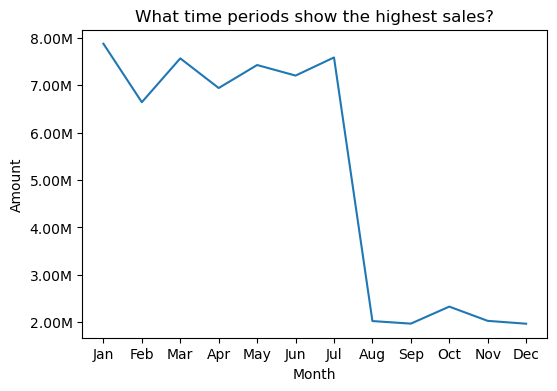

In [43]:
from matplotlib.ticker import FuncFormatter

# create figure
plt.figure(figsize=(6,4))

sns.lineplot(data=monthly_trend, x = 'Month', y='Amount', markers=True)
plt.title("What time periods show the highest sales?")

# format y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1_000_000:.2f}M'))

# save chart
plt.savefig("Monthly_Trend.jpeg")

plt.show()

> The peak sales occur in the month of **January**

**Top products codes (biscuit brands)**

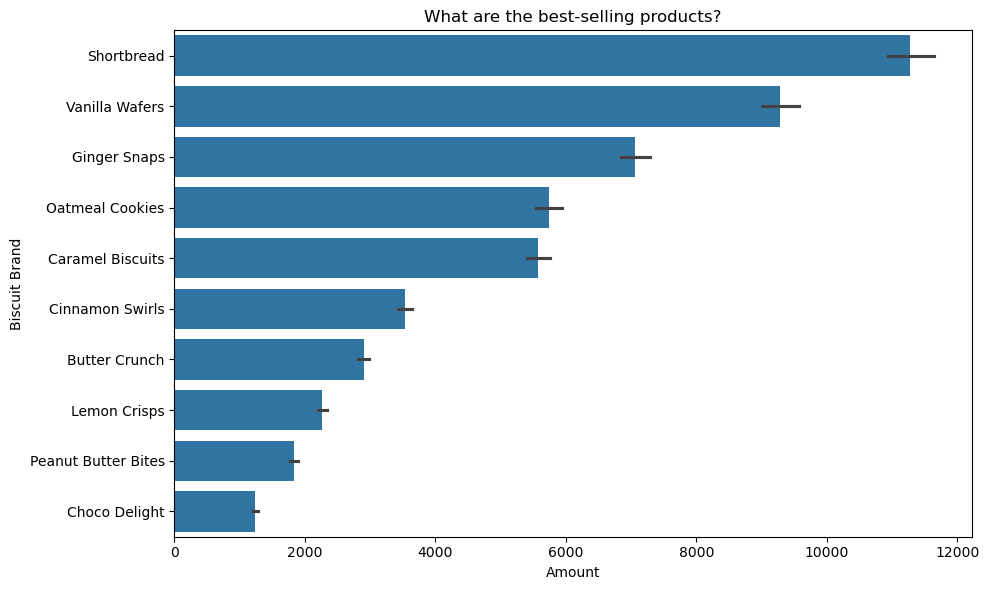

In [44]:
# order products
order_products = bj_data.sort_values("Amount", ascending=False)['Biscuit Brand']

# barplot
plt.figure(figsize=(10,6))

sns.barplot(data=bj_data,  y="Biscuit Brand", x="Amount", order= order_products)
plt.title("What are the best-selling products?")

# save chart
plt.savefig("Top_Products.jpeg")

plt.tight_layout()
plt.show()

> **Shortbread** and **Vanilla Wafers** are the best selling products

**Sales representative performance ranking**

In [45]:
top_reps = bj_data.groupby('Sales Representative')['Quantity Purchased'].sum().reset_index().sort_values("Quantity Purchased", ascending=False)
top_reps

,Sales Representative,Quantity Purchased
7,Travis Doyle,538601
2,Joseph Hill,520765
0,April Watkins,478562
5,Susan Dean,413253
4,Sara Robertson,388599
3,Katie Stanton,333973
6,Tracy Lee,298243
1,Elizabeth Guerrero,78313


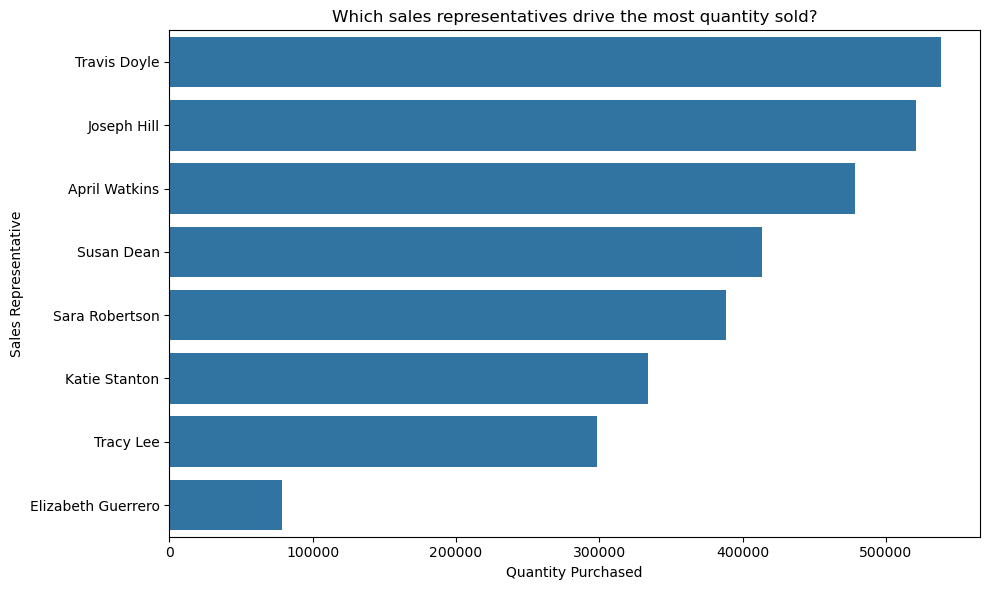

In [46]:
# barplot
plt.figure(figsize=(10,6))

sns.barplot(data=top_reps, y="Sales Representative", x="Quantity Purchased")
plt.title("Which sales representatives drive the most quantity sold?")

# save chart
plt.savefig("Sales_Rep.jpeg")

plt.tight_layout()
plt.show()

> **Travis Doyle** and **Joseph Hill** drives the most quantity sold.

#### Customer Insights

**Gender distribution**

In [47]:
 gender_distribution = bj_data.groupby('Gender')['Amount'].sum().reset_index().sort_values("Amount", ascending=False)
 gender_distribution 

,Gender,Amount
1,Male,50649041
0,Female,7162363
2,Other,3756479


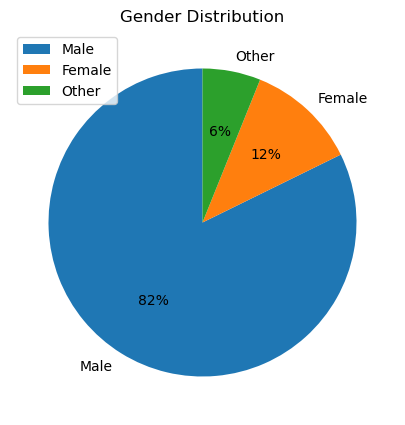

In [48]:
# create pie chart

# create a figure
plt.figure(figsize=(8,5))

plt.pie(gender_distribution['Amount'], labels=gender_distribution['Gender'], startangle=90, autopct='%1.f%%')
plt.title("Gender Distribution")
plt.legend()

# save chart
plt.savefig("Gender_Distribution.jpeg")

plt.show()

> Majority of the buyers are **male**

**Age distribution**

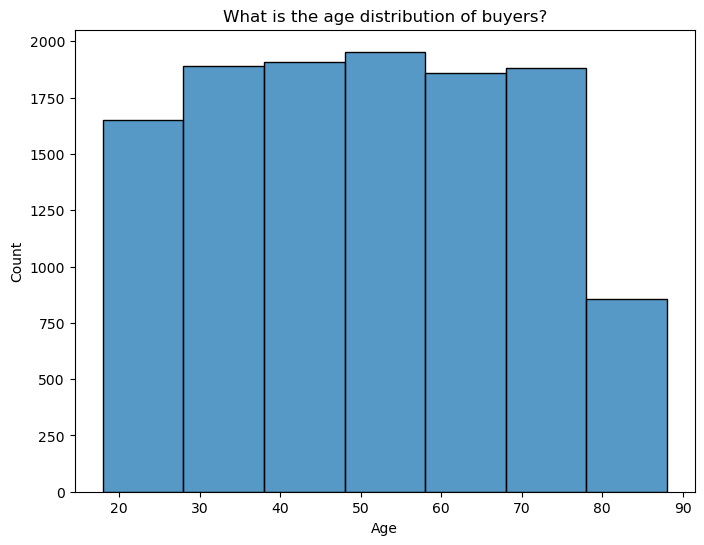

In [49]:
# seaborn - histogram
# bin range
bin_range = np.arange(18, bj_data['Age'].max()+10, 10)
    
plt.figure(figsize=(8,6))

sns.histplot(data=bj_data, x='Age', bins=bin_range)
plt.title("What is the age distribution of buyers?")

# save chart
plt.savefig("Age_Distribution.jpeg")

plt.show()

> Most of the high buyers are within the age range of **30 - 60 years**

**Top customer locations**

In [50]:
top_locations = bj_data.groupby('Buyer Location')['Amount'].sum().reset_index().sort_values("Amount", ascending=False)
top_locations

,Buyer Location,Amount
7,San Antonio,7343282
9,San Jose,6343424
5,Philadelphia,6315796
2,Houston,6179951
1,Dallas,6128566
3,Los Angeles,6066717
8,San Diego,6036613
4,New York,5776850
6,Phoenix,5710119
0,Chicago,5666565


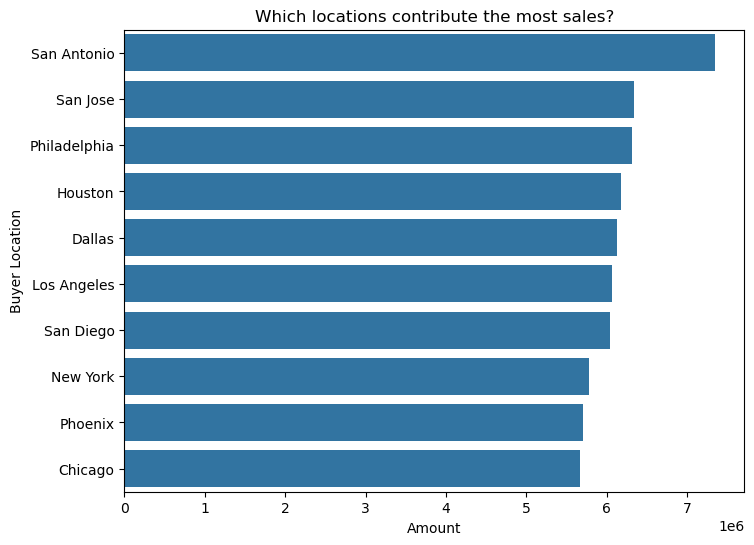

In [51]:
# barplot
plt.figure(figsize=(8,6))

sns.barplot(data=top_locations, y="Buyer Location", x="Amount")
plt.title("Which locations contribute the most sales?")

# save chart
plt.savefig("Top_Locations.jpeg")

plt.show()

> **San Antonio** and **San Jose** contributed the highest total sales

**Payment method usage**

In [52]:
payment_method = bj_data.groupby('Payment Method')['Amount'].sum().reset_index().sort_values("Amount", ascending=False)
payment_method

,Payment Method,Amount
1,Credit Card,24258340
2,Debit Card,15645650
0,Cash,15010080
3,Mobile Payment,6653813


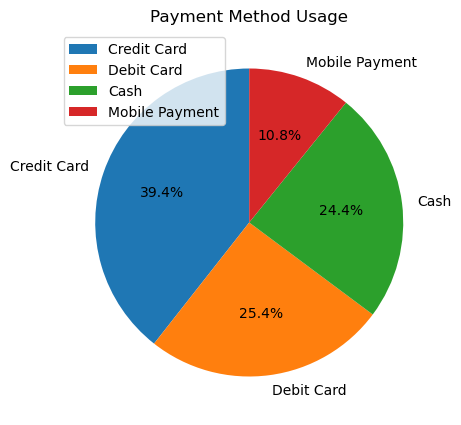

In [53]:
# create pie chart

# create a figure
plt.figure(figsize=(8,5))

plt.pie(payment_method['Amount'], labels=payment_method['Payment Method'], startangle=90, autopct='%1.1f%%')
plt.title("Payment Method Usage")
plt.legend()

# save chart
plt.savefig("Payment_Method.jpeg")

plt.show()

> Most of the sales are generated through **Credit Card**

>**Note:** The cleaned dataset will be used for creating the business **sales peformance dashboard** for **executive summary** in **Excel**